In [ ]:
import pandas as pd

df = pd.read_csv("C:\\Users\\ahmed\\Downloads\\fcc-forum-pageviews.csv")

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['value'] = pd.to_numeric(df['value'])

print(df.head())

            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


In [37]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df.reset_index(inplace=True)

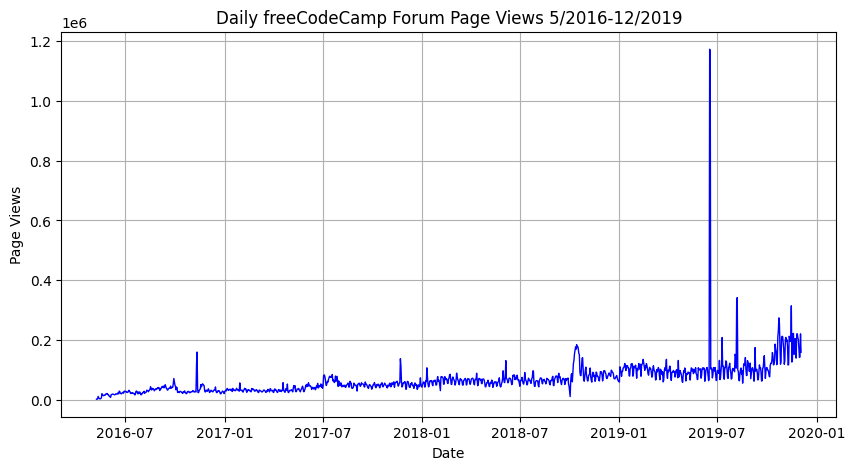

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['value'], color='blue', linewidth=1)

plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

plt.grid()

plt.show()

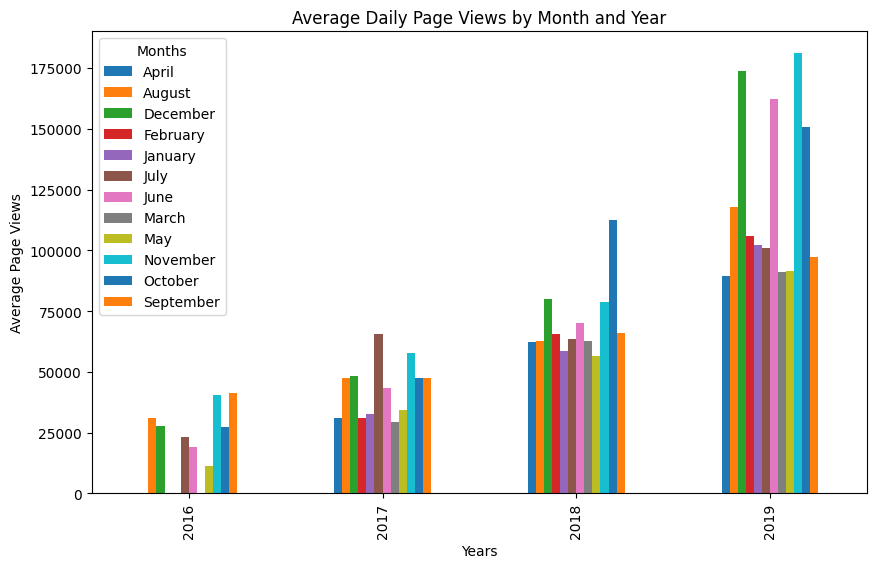

In [49]:
df = pd.read_csv("C:\\Users\\ahmed\\Downloads\\fcc-forum-pageviews.csv")

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['year'] = df.index.year
df['month'] = df.index.month_name()

df_grouped = df.groupby(['year', 'month'])['value'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
df_grouped.plot(kind='bar', ax=ax)

ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.set_title('Average Daily Page Views by Month and Year')

ax.legend(title='Months')

plt.show()

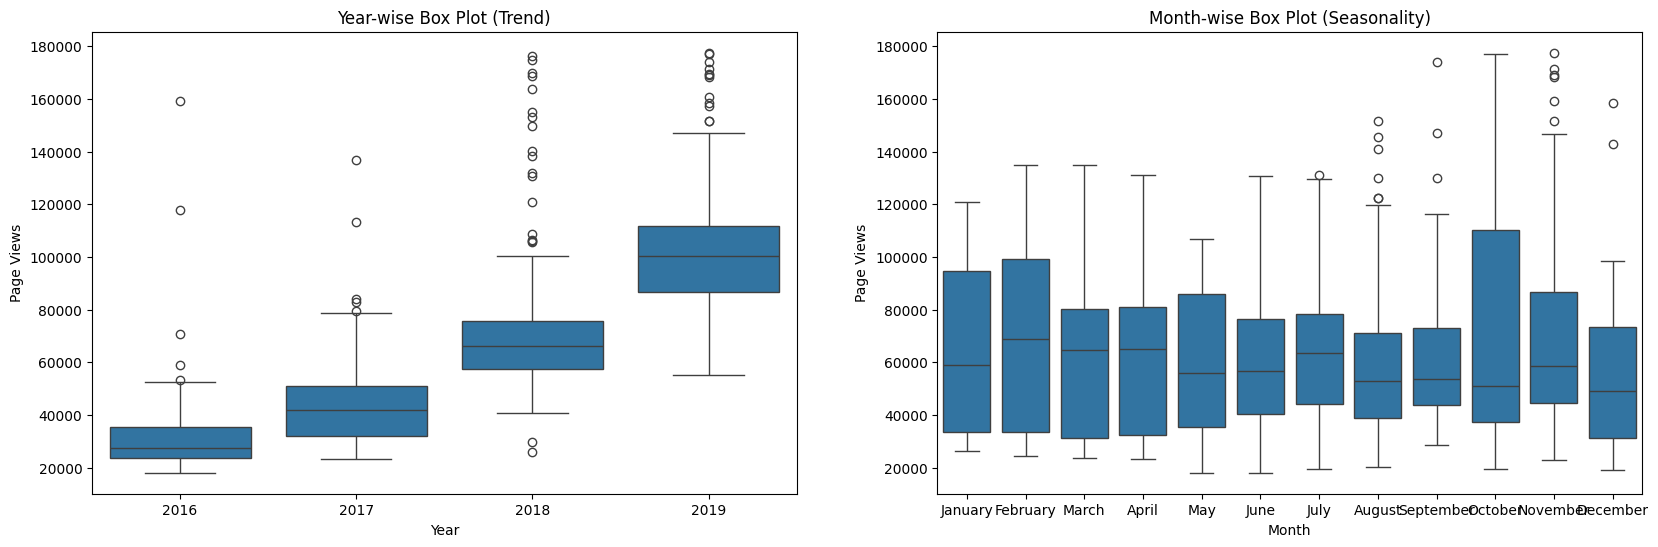

In [ ]:
import seaborn as sns
df = pd.read_csv("C:\\Users\\ahmed\\Downloads\\fcc-forum-pageviews.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df['year'] = df.index.year
df['month'] = df.index.month_name()

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='value', data=df)
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel('Year')
plt.ylabel('Page Views')

plt.subplot(1, 2, 2)
sns.boxplot(x='month', y='value', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Month-wise Box Plot (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Page Views')

plt.show()